In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
train = pd.read_csv('train_cleaned.csv', dtype={'fullVisitorId': 'str'})
test = pd.read_csv('test_cleaned.csv', dtype={'fullVisitorId': 'str'})

train.loc[:,'visitStartTime'] = pd.to_datetime(train.loc[:,'visitStartTime'])
test.loc[:,'visitStartTime'] = pd.to_datetime(test.loc[:,'visitStartTime'])

train.loc[:,'date'] = pd.to_datetime(train.loc[:,'date'])
test.loc[:,'date'] = pd.to_datetime(test.loc[:,'date'])



In [24]:
train.dtypes

channelGrouping                                         object
date                                            datetime64[ns]
fullVisitorId                                           object
sessionId                                               object
visitId                                                  int64
visitNumber                                              int64
visitStartTime                                  datetime64[ns]
device.browser                                          object
device.deviceCategory                                   object
device.isMobile                                           bool
device.operatingSystem                                  object
geoNetwork.city                                         object
geoNetwork.continent                                    object
geoNetwork.country                                      object
geoNetwork.metro                                        object
geoNetwork.networkDomain                               

In [32]:
total = pd.concat([train, test], axis=0, sort=False)

In [125]:
# %run -i 'datapre.py'

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)
Processing json completed!
drop cols complete
Cleaning num complete
Cleaning cat complete


In [13]:
import gc

In [25]:
min(train['date'])

Timestamp('2016-08-01 00:00:00')

In [26]:
max(train['date'])

Timestamp('2017-08-01 00:00:00')

In [6]:
train.shape

(903653, 55)

In [14]:
min(test['date'])

Timestamp('2017-08-02 00:00:00')

In [15]:
max(test['date'])

Timestamp('2018-04-30 00:00:00')

In [5]:
test.shape

(804684, 53)

In [143]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [27]:
test.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [8]:
total.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [145]:
total.shape

(1708337, 35)

In [130]:
train['totals.transactionRevenue'].mean()

1704272.8126836296

In [14]:
user_rev = train[['fullVisitorId', 'totals.transactionRevenue']].groupby('fullVisitorId').sum().reset_index()
user_rev.columns = ['fullVisitorId', 'user_rev']

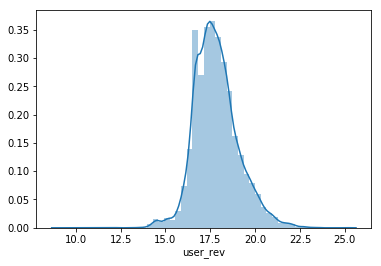

In [147]:
# Distribution of target value excluding zero
sns.distplot(np.log(user_rev['user_rev'][user_rev['user_rev']>0]+1))

In [148]:
user_rev['target'] = np.log(user_rev['user_rev']+1)

In [28]:
np.log(user_rev['user_rev'][user_rev['user_rev']>0]+1).describe()

count    9996.000000
mean       17.828569
std         1.233167
min         9.210440
25%        17.013673
50%        17.704162
75%        18.501938
max        25.068543
Name: user_rev, dtype: float64

In [15]:
sess_rev = total[['sessionId', 'totals.transactionRevenue']].groupby('sessionId').sum().reset_index()
sess_rev.columns = ['sessionId', 'sess_rev']

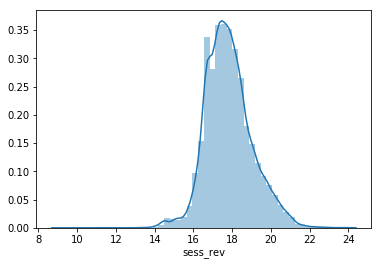

In [39]:
sns.distplot(np.log(sess_rev['sess_rev'][sess_rev['sess_rev']>0]+1))

In [27]:
np.log(sess_rev['sess_rev'][sess_rev['sess_rev']>0]+1).describe()

count    11514.000000
mean        17.823330
std          1.202576
min          9.210440
25%         17.031582
50%         17.716473
75%         18.493490
max         23.864375
Name: sess_rev, dtype: float64

In [29]:
total = total.merge(user_rev)

In [30]:
total.shape

(1708337, 56)

In [36]:
min(total['date'])

Timestamp('2016-08-01 00:00:00')

In [53]:
max(total['date'][0:903653])

Timestamp('2018-04-30 00:00:00')

In [27]:
date_rev = train[['date', 'totals.transactionRevenue']].groupby('date').sum().reset_index()
date_rev.columns = ['date', 'date_rev_sum']
date_rev['date_rev_mean'] = train[['date', 'totals.transactionRevenue']].groupby('date').mean().reset_index()['totals.transactionRevenue']

In [35]:
date_visitor = total[['date', 'fullVisitorId']].groupby('date').count().reset_index()
date_visitor.columns = ['date', 'visitor_count_day']

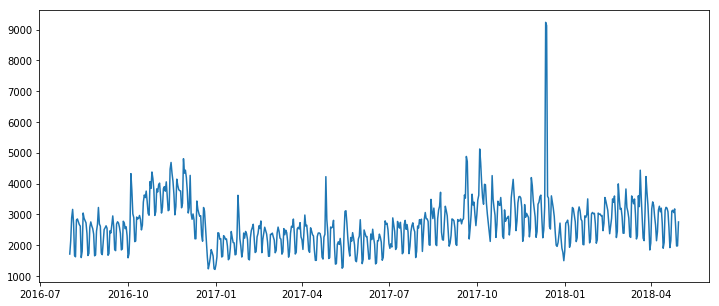

In [44]:
plt.figure(figsize=(12,5))
plt.plot(date_visitor['date'], date_visitor['visitor_count_day'])

In [43]:
week_visitor = date_visitor.resample('w', on='date').sum().reset_index()
week_visitor.columns = ['date', 'visitor_count_week']


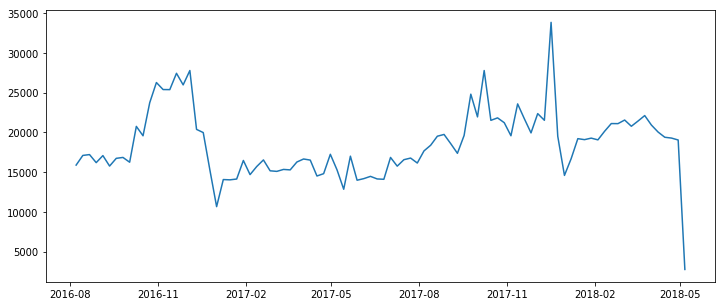

In [46]:
plt.figure(figsize=(12,5))
plt.plot(week_visitor['date'], week_visitor['visitor_count_week'])

In [158]:
date_rev['date_sess_count'] = train[['date', 'sessionId']].groupby('date').count().reset_index()['sessionId']

In [159]:
date_rev['date_visitor_count'] = train[['date', 'fullVisitorId']].groupby('date').count().reset_index()['fullVisitorId']


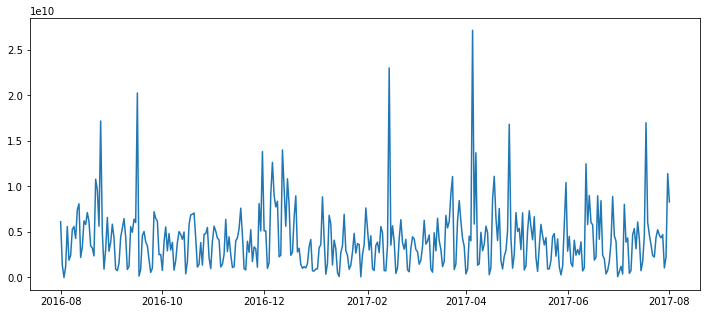

In [160]:
plt.figure(figsize=(12,5))
plt.plot(date_rev['date'], date_rev['date_rev_sum'])

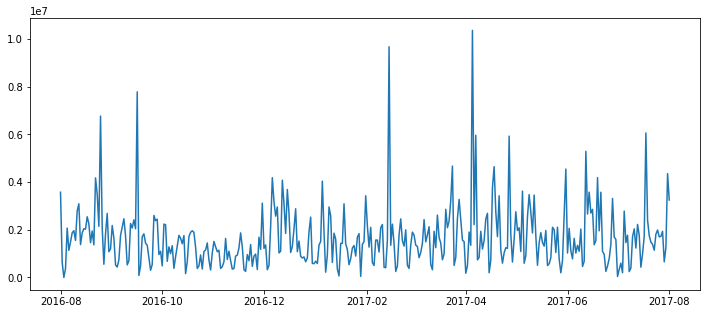

In [162]:
plt.figure(figsize=(12,5))
plt.plot(date_rev['date'], date_rev['date_rev_mean'])

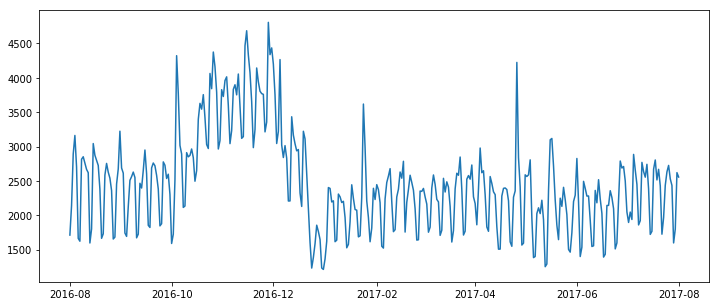

In [163]:
plt.figure(figsize=(12,5))
plt.plot(date_rev['date'], date_rev['date_sess_count'])

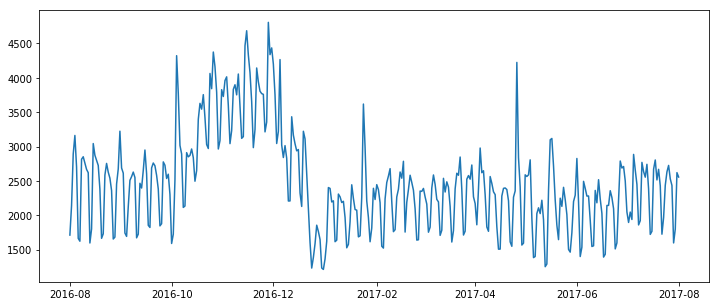

In [164]:
plt.figure(figsize=(12,5))
plt.plot(date_rev['date'], date_rev['date_visitor_count'])

In [165]:
date_rev.columns

Index(['date', 'date_rev_sum', 'date_rev_mean', 'date_sess_count',
       'date_visitor_count'],
      dtype='object')

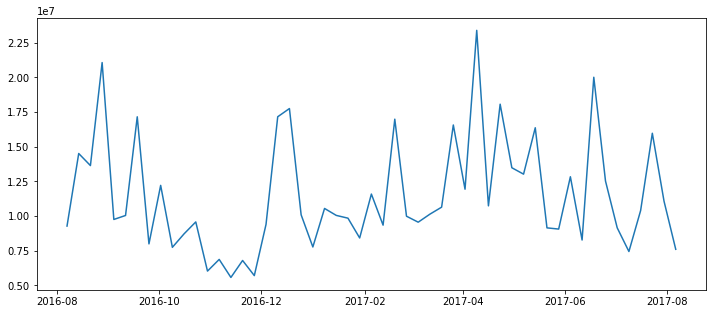

In [166]:
plt.figure(figsize=(12,5))
week_rev = date_rev.resample('w', on='date').sum().reset_index()
week_rev.columns = ['date', 'week_rev_sum', 'week_rev_mean', 'week_sess_count',
       'week_visitor_count']
plt.plot(week_rev['date'], week_rev['week_rev_mean'])

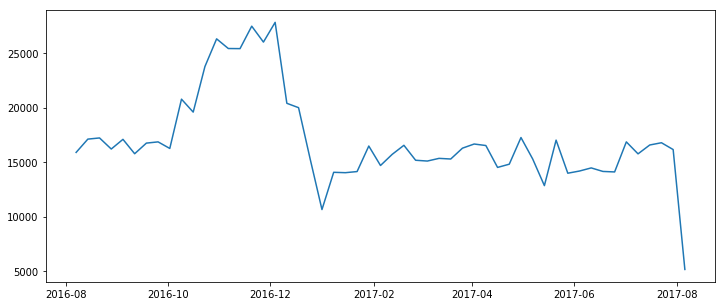

In [167]:
plt.figure(figsize=(12,5))
plt.plot(week_rev['date'], week_rev['week_sess_count'])

In [168]:
date_rev['dayofweek'] = pd.DatetimeIndex(date_rev['date']).dayofweek.astype(str)

In [170]:
date_rev[['dayofweek', 'date_rev_sum']].groupby('dayofweek').mean()

,date_rev_sum
dayofweek,
0,5.133024e+09
1,5.801250e+09
2,5.740162e+09
3,5.176357e+09
4,4.974167e+09
5,1.123026e+09
6,1.458495e+09


In [ ]:
time_agg = total

In [12]:
def compare_train_test_cat(colname):
    a = train[colname].value_counts()/train.shape[0]
    b = test[colname].value_counts()/test.shape[0]
    print('First col for train, second for test')
    return pd.concat([a,b], axis=1, sort=True)

In [13]:
compare_train_test_cat('channelGrouping')

First col for train, second for test


,channelGrouping,channelGrouping
(Other),0.000133,0.000021
Affiliates,0.018152,0.020520
Direct,0.158275,0.161688
Display,0.006930,0.055949
Organic Search,0.422243,0.444152
Paid Search,0.028026,0.025229
Referral,0.116016,0.132312
Social,0.250225,0.160130


In [6]:
compare_train_test_cat('device.deviceCategory')

First col for train, second for test


,device.deviceCategory,device.deviceCategory
desktop,0.735325,0.630185
mobile,0.230979,0.326353
tablet,0.033695,0.043462


In [76]:
compare_train_test_cat('geoNetwork.subContinent')

First col for train, second for test


,geoNetwork.subContinent,geoNetwork.subContinent
(not set),0.001625,0.001304
Australasia,0.016481,0.016123
Caribbean,0.002663,0.002456
Central America,0.017244,0.017375
Central Asia,0.001345,0.000957
Eastern Africa,0.002132,0.002817
Eastern Asia,0.051921,0.054870
Eastern Europe,0.050073,0.035738
Melanesia,0.000090,0.000065
Micronesian Region,0.000061,0.000091


In [19]:
compare_train_test_cat('trafficSource.adwordsClickInfo.adNetworkType')

First col for train, second for test


,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.adNetworkType
Content,NaN,0.052472
Google Search,0.023740,0.014403
Search partners,0.000008,0.000001


In [35]:
compare_train_test_cat('trafficSource.adwordsClickInfo.page')

First col for train, second for test


,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.page
1.0,0.023640,0.065306
2.0,0.000081,0.001223
3.0,0.000011,0.000201
4.0,0.000002,0.000097
5.0,0.000008,0.000029
6.0,NaN,0.000012
7.0,0.000003,0.000004
8.0,NaN,0.000001
9.0,0.000002,0.000001
12.0,NaN,0.000001


In [41]:
compare_train_test_cat('trafficSource.medium')

First col for train, second for test


,trafficSource.medium,trafficSource.medium
(none),0.158275,0.161688
(not set),0.000133,0.000021
affiliate,0.018152,0.020520
cpc,0.028026,0.077700
cpm,0.006930,0.003477
organic,0.422243,0.444152
referral,0.366241,0.292442


In [43]:
compare_train_test_cat('trafficSource.source')

First col for train, second for test


,trafficSource.source,trafficSource.source
(direct),0.158278,0.161708
(not set),0.000076,0.000001
0.muppet1.frontend.gws.muppet-exp.ij-q.borg.google.com:14634,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9824,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9857,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9860,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9879,0.000001,NaN
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9898,0.000002,NaN
0.shared.bow.cat2.ads-bow.qk.borg.google.com:9801,0.000001,0.000001


In [44]:
def compare_train_test_num(colname):
    a = train[colname].describe()
    b = test[colname].describe()
    print('First col for train, second for test')
    return pd.concat([a,b], axis=1, sort=True)

In [103]:
compare_train_test_num('totals.hits')

First col for train, second for test


,totals.hits,totals.hits
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,4.000000,4.000000
count,903653.000000,804684.000000
max,500.000000,500.000000
mean,4.596538,4.242126
min,1.000000,1.000000
std,9.641437,8.196982


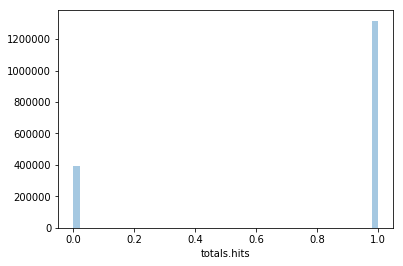

In [116]:
sns.distplot(total['totals.hits']<5, kde=False)

In [112]:
len(total['totals.hits'][total['totals.hits']<5])/len(total['totals.hits'])

0.7708508332957724

In [18]:
total[total['totals.transactionRevenue']>0][['totals.hits', 'totals.pageviews', 'totals.transactionRevenue']].corr()

,totals.hits,totals.pageviews,totals.transactionRevenue
totals.hits,1.000000,0.980058,0.141973
totals.pageviews,0.980058,1.000000,0.128644
totals.transactionRevenue,0.141973,0.128644,1.000000


In [172]:
def cat_sess_rev(colname):
    df = train[[colname, 'totals.transactionRevenue']].groupby([colname]).mean().reset_index()
    df.columns = [colname, 'mean_revenue']
    df = df.sort_values(by='mean_revenue', ascending=False)
    return df

In [183]:
def cat_visitor_count(colname):
    df = train[[colname, 'fullVisitorId']].groupby([colname]).count().reset_index()
    df.columns = [colname, 'count_visitor']
    df = df.sort_values(by='count_visitor', ascending=False)
    return df

In [174]:
cat_sess_rev('device.operatingSystem').head(10)

,device.operatingSystem,mean_revenue
3,Chrome OS,6.984005e+06
7,Macintosh,3.372381e+06
6,Linux,1.253365e+06
16,Windows,1.134946e+06
1,Android,2.933303e+05
19,iOS,2.058877e+05
17,Windows Phone,2.171053e+04
12,Nokia,0.000000e+00
18,Xbox,0.000000e+00
15,SunOS,0.000000e+00


In [184]:
cat_visitor_count('device.operatingSystem').head(10)

,device.operatingSystem,count_visitor
16,Windows,350072
7,Macintosh,253938
1,Android,123892
19,iOS,107665
6,Linux,35034
3,Chrome OS,26337
0,(not set),4695
17,Windows Phone,1216
14,Samsung,280
2,BlackBerry,218


In [178]:
cat_sess_rev('geoNetwork.subContinent').head(10)

,geoNetwork.subContinent,mean_revenue
12,Northern America,3.801967e+06
5,Eastern Africa,2.734146e+06
20,Western Africa,1.283482e+06
2,Caribbean,6.498545e+05
0,(not set),5.243733e+05
15,South America,3.819058e+05
6,Eastern Asia,2.360498e+05
3,Central America,1.222839e+05
1,Australasia,1.204076e+05
16,Southeast Asia,4.827751e+04


In [185]:
cat_visitor_count('geoNetwork.subContinent').head(10)

,geoNetwork.subContinent,count_visitor
12,Northern America,390657
16,Southeast Asia,77800
18,Southern Asia,59321
22,Western Europe,59114
13,Northern Europe,58168
6,Eastern Asia,46919
7,Eastern Europe,45249
15,South America,41731
21,Western Asia,38443
19,Southern Europe,35780


In [188]:
cat_sess_rev('trafficSource.adContent').head(10)

,trafficSource.adContent,mean_revenue
36,{KeyWord:Google Branded Gear},3.346866e+06
17,Google Merchandise Collection,2.920404e+06
40,{KeyWord:Google Men's T-Shirts},2.594000e+06
31,unknown,1.707013e+06
0,20% discount,1.112267e+06
27,Swag with Google Logos,5.384375e+05
44,{KeyWord:Want Google Stickers?},5.342857e+05
39,{KeyWord:Google Drinkware},4.671875e+05
5,Display Ad created 11/17/14,4.590000e+05
10,Full auto ad IMAGE ONLY,3.191971e+05


In [186]:
cat_visitor_count('trafficSource.adContent').head(10)

,trafficSource.adContent,count_visitor
31,unknown,892707
17,Google Merchandise Collection,5122
18,Google Online Store,1245
6,Display Ad created 3/11/14,967
10,Full auto ad IMAGE ONLY,822
3,Ad from 12/13/16,610
1,Ad from 11/3/16,489
7,Display Ad created 3/11/15,392
34,{KeyWord:Google Brand Items},251
41,{KeyWord:Google Merchandise},155


In [53]:
cat_sess_rev('trafficSource.adwordsClickInfo.gclId').head(10)

,trafficSource.adwordsClickInfo.gclId,mean_revenue
12960,CjwKEAiAg5_CBRDo4o6e4o3NtG0SJAB-IatYpK8-KPIoYe...,1.242850e+09
11607,CjwKCAjw5YfHBRBzEiwArj4pdP2ubuZxgPuL5eTz9B-LBX...,1.194040e+09
11580,CjwKCAjw4cLKBRAZEiwAl_sgQvFh360uREQ3k2PdSGZfsh...,7.890800e+08
10838,Cj0KEQjwvIO_BRDt27qG3YX0w4wBEiQAsGu3eRqPWOWnGe...,7.645500e+08
8973,Cj0KEQjw1K2_BRC0s6jtgJzB-aMBEiQA-WzDMfX0_DHtEm...,7.645500e+08
8656,Cj0KEQiAyuPCBRCimuayhb3qqvwBEiQAgz62kZkAHDv6c5...,7.473000e+08
8775,Cj0KEQjw-73GBRCC7KODl9zToJMBEiQAj1Jgf4L-TvGf-1...,7.391167e+08
5379,CPzzwavXsNICFdGCswod1CULFA,6.824000e+08
69,CI716_KHxc4CFUEkhgodld8HWw,6.810200e+08
7047,Cj0KEQiA56_FBRDYpqGa2p_e1MgBEiQAVEZ6-58XLFNfcH...,6.578600e+08


In [56]:
cat_sess_rev('trafficSource.adwordsClickInfo.page')

,trafficSource.adwordsClickInfo.page,mean_revenue
0,1.0,9.389469e+07
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
5,7.0,NaN
6,9.0,NaN
7,14.0,NaN


In [57]:
cat_sess_rev('trafficSource.adwordsClickInfo.slot')

,trafficSource.adwordsClickInfo.slot,mean_revenue
1,Top,9.396735e+07
0,RHS,8.737000e+07


In [58]:
cat_sess_rev('trafficSource.campaign')

,trafficSource.campaign,mean_revenue
0,(not set),1.354553e+08
1,AW - Accessories,1.185986e+08
3,AW - Dynamic Search Ads Whole Site,8.400170e+07
2,AW - Apparel,7.782000e+07
7,Data Share Promo,6.637556e+07
9,test-liyuhz,4.200000e+07
8,Retail (DO NOT EDIT owners nophakun and tianyu),2.295000e+07
4,AW - Electronics,NaN
5,All Products,NaN
6,Data Share,NaN


In [65]:
cat_sess_rev('trafficSource.keyword').head(10)

,trafficSource.keyword,mean_revenue
1901,googlesupport,4.168000e+08
1873,googlemerchandisestore,2.164300e+08
198,Google Merchandise,1.794016e+08
16,+Google +Merchandise,1.466186e+08
45,+google +merchandise +store,1.114200e+08
11,(not provided),9.514171e+07
1420,google merchandise store,9.494627e+07
95,6qEhsCssdK0z36ri,8.805709e+07
64,+google+tshirts,7.782000e+07
3249,youtube merchandise store,7.693000e+07


In [67]:
cat_sess_rev('trafficSource.medium')

,trafficSource.medium,mean_revenue
4,cpm,5.516723e+08
0,(none),2.129484e+08
6,referral,1.212089e+08
5,organic,9.493325e+07
3,cpc,9.307457e+07
2,affiliate,6.637556e+07
1,(not set),9.990000e+06


In [68]:
cat_sess_rev('trafficSource.referralPath').head(10)

,trafficSource.referralPath,mean_revenue
1087,/mail/u/0/,4.156602e+08
403,/community/partners/local-sites/japanese/gsuit...,2.548500e+08
426,/deal/-ds-sign-up-for-google-merchandise-store...,2.045788e+08
189,/a/google.com/googletopia/discounts-deals-and-...,1.553175e+08
147,/_/scs/mail-static/_/js/k=gmail.main.en.sXDiEp...,1.540400e+08
1128,/offer/2145,1.208633e+08
0,/,1.194863e+08
175,/a/google.com/another-attempt-google-merchandi...,1.084500e+08
225,/a/google.com/nestlabs/nestling/nestling,1.076650e+08
10,/2610273/projects/12161610/todos/250267685,1.058000e+08


In [70]:
cat_sess_rev('trafficSource.source')

,trafficSource.source,mean_revenue
120,dfa,6.254343e+08
263,mail.google.com,3.762566e+08
0,(direct),2.129484e+08
117,dealspotr.com,1.422660e+08
107,connect.googleforwork.com,1.349367e+08
142,gdeals.googleplex.com,1.208633e+08
267,mall.googleplex.com,1.201192e+08
79,basecamp.com,1.058000e+08
334,sites.google.com,1.045424e+08
325,search.myway.com,1.009400e+08


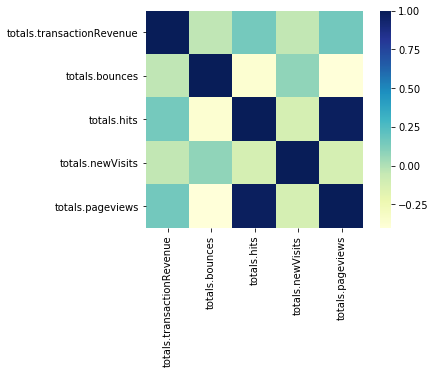

In [189]:
train_num = train[['totals.transactionRevenue', 'totals.bounces','totals.hits',
                  'totals.newVisits','totals.pageviews']]
sns.heatmap(train_num.corr(), square=True, cmap="YlGnBu")